#Problem 4: Binary Image Processing

1.Implement the connected components algorithm and use it to label the binarized version of I.

In [ ]:
import numpy 

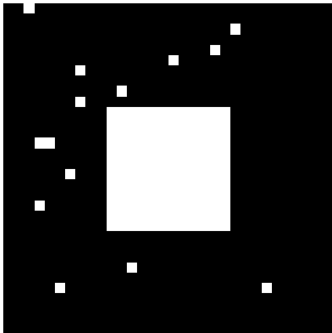

In [ ]:
I = cv2.imread('/content/drive/MyDrive/D22180_HW_3/s1.png',0)# original image
cv2_imshow(I)

In [ ]:

# CCA Connected Component Analysis Algorithm function
def CCA(I, newI):
    R = numpy.array(newI, dtype=numpy.uint16) #Label Matrix
    # initializing equivalency list
    E = [0] #equivalency_list
    lv = 0 #    Label value
    for i in range(r):
        for j in range(c):
            if I[i, j] == 1:
                top = R[i, j + 1]
                left = R[i + 1, j]
                if top == 0 and left == 0:
                    lv = lv + 1
                    E.append(lv)
                    R[i + 1, j + 1] = lv
                elif top == 0 and left != 0:
                    R[i + 1, j + 1] = left
                elif top != 0 and left == 0:
                    R[i + 1, j + 1] = top
                elif top == left == 1:
                    R[i + 1, j + 1] = top
                else:
                    x = min(top, left)
                    y = max(top, left)
                    R[i + 1, j + 1] = x
                    for v in range(len(E)):
                        if E[v] == y:
                            E[v] = x
    return E

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# size of image
r = I.shape[0] #r= row
c = I.shape[1] #c= columns
#print("convertion image to 0's and 1's")
for i in range(r):
    for j in range(c):
        if I[i, j] >= 127:
            I[i, j] = 1
        else:
            I[i, j] = 0
#print("padding")
newI = numpy.pad(I, pad_width=[(1, 1), (1, 1)], mode='constant', constant_values=0)
print("Finding No of Objects by Applying cca")
E = CCA(I, newI)
No_Of_CCA_Objects = numpy.count_nonzero(numpy.unique(E))
print('No of Objects: ', No_Of_CCA_Objects)


Finding No of Objects by Applying cca
No of Objects:  14


original image


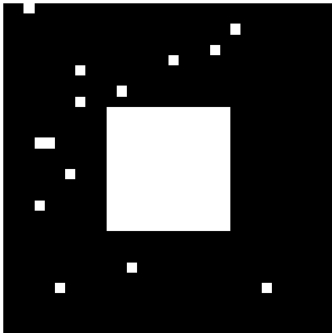

In [ ]:
print("original image")
B = cv2.imread('/content/drive/MyDrive/D22180_HW_3/s1.png')# original image
cv2_imshow(B)

Complement of Original image


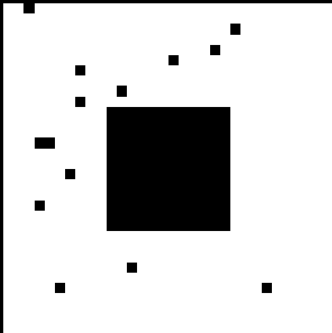

In [ ]:
print("Complement of Original image")
complemented_image_orginalImg = 255 - B
cv2_imshow(complemented_image_orginalImg)


In [ ]:
#Save image
import os
directory = r'/content/drive/MyDrive/D22180_HW_3'
img = complemented_image_orginalImg
os.chdir(directory)
print(os.listdir(directory))  
filename = 'Complement_s1.jpg'
cv2.imwrite(filename, img)


['1.png', '2.png', 'lena.jpg', 'fg1.jpg', 'triangle.png', 'ch.jpg', 's1.png', ' D22180_HW_3.ipynb', 'D22180_HW_3_1.ipynb', 'Copy of Copy of D22180_HW_3new.ipynb', '  D22180_HW_3_3.ipynb', ' D22180_HW_3_2.ipynb', 'savedImage.jpg', 'Complement_s1.jpg']


True

#APPLY CONNECTED COMPONNET OPERATION

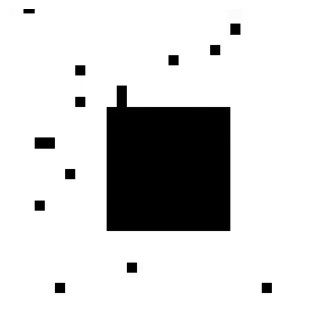

No of Objects:  1


In [ ]:
#Counting the Connected Component
# CCA Connected Component Analysis Algorithm function
def CCA(I, newI):
    R = numpy.array(newI, dtype=numpy.uint16) #Label Matrix
    # initializing equivalency list
    E = [0] #equivalency_list
    lv = 0 #    Label value
    for i in range(r):
        for j in range(c):
            if I[i, j] == 1:
                top = R[i, j + 1]
                left = R[i + 1, j]
                if top == 0 and left == 0:
                    lv = lv + 1
                    E.append(lv)
                    R[i + 1, j + 1] = lv
                elif top == 0 and left != 0:
                    R[i + 1, j + 1] = left
                elif top != 0 and left == 0:
                    R[i + 1, j + 1] = top
                elif top == left == 1:
                    R[i + 1, j + 1] = top
                else:
                    x = min(top, left)
                    y = max(top, left)
                    R[i + 1, j + 1] = x
                    for v in range(len(E)):
                        if E[v] == y:
                            E[v] = x
    return E

#print("original image")
I = cv2.imread('/content/drive/MyDrive/D22180_HW_3/Complement_s1.jpg',0)
cv2_imshow(I)

# size of image
r = I.shape[0] #r= row
c = I.shape[1] #c= columns
#print("convertion image to 0's and 1's")
for i in range(r):
    for j in range(c):
        if I[i, j] >= 127:
            I[i, j] = 1
        else:
            I[i, j] = 0
#print("padding")
newI = numpy.pad(I, pad_width=[(1, 1), (1, 1)], mode='constant', constant_values=0)
#print("Finding No of Objects by Applying cca")
E = CCA(I, newI)
No_Of_CCA_Objects = numpy.count_nonzero(numpy.unique(E))
print('No of Objects: ', No_Of_CCA_Objects)

#APPLY MINOR BLOB REMOVAL OPRATION

In [ ]:
# s= size, k=kernel 

s = 20
# Structuring Element along with the size 
k = numpy.ones((s, s), numpy.uint8)
# padding size
p_s = s//2
# reading of the image 
Com = I
# getting size of image
r = Com.shape[0]
c = Com.shape[1]

In [ ]:
print("padding of image") # P_I = padded image
def P_I(Com, padSize):
    P_Image = numpy.zeros((r+2*padSize, c+2*padSize), dtype=numpy.uint8)
    # using Slicing
    P_Image[padSize:r+padSize, padSize:c+padSize] = Com
    return P_Image

padding of image


 minor Blob removed image FUNCTION IS WORKING
 minor Blob removed image


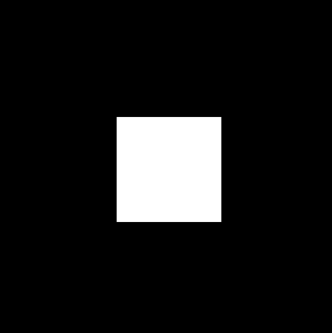

In [ ]:
print(" minor Blob removed image FUNCTION IS WORKING") 
def MINNOR_B_R(P_Image, k, s):
    MINNOR_B_R_O = numpy.zeros((r, c), dtype=numpy.uint8)
    for i in range(0, r):
        for j in range(0, c):
            # Slicing
            p = P_Image[i:i+s, j:j+s]
            p1 = p.flatten()
            p2 = k.flatten()
            # sum of kernel and window
            p11 = (numpy.sum(p1))
            p22 = (numpy.sum(p2))*255
            # if Fit condition satisfies
            if p11 == p22:
                MINNOR_B_R_O[i, j] = 255
            else:
                MINNOR_B_R_O[i, j] = numpy.min(p1)
    return MINNOR_B_R_O
  
#  calling the padding function
P_Image = P_I(I, p_s)
#   minor Blob removed image OPERATION
minor_Blob_removed_image = MINNOR_B_R(P_Image, k, s)
print(" minor Blob removed image") 
cv2_imshow( minor_Blob_removed_image)

APPLY COMPLEMENT OPERATION ON MINOR BLOB REMOVED IMAGE

Complement of minor Blob removed image


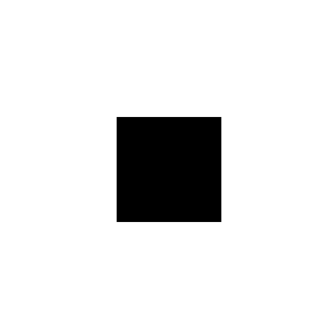

In [ ]:
print("Complement of minor Blob removed image")
complemented_minor_Blob_removed_image = 255 - minor_Blob_removed_image
cv2_imshow(complemented_minor_Blob_removed_image)